In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl

from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data["label"]  = data[label]
degs_gene_data

<ipython-input-2-cc550c6d2cf5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degs_gene_data["label"]  = data[label]


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123,
                                                   shuffle=True, stratify=y )
X[:,0]

array([ 7.83775973,  7.75198314, 10.27905306,  9.60160927,  7.78519525,
        5.14753555,  7.14121395, 11.38452663,  8.26078177,  6.22483544,
        6.46213086,  7.79898583,  4.20774828,  7.07662203,  3.93496862,
        6.60139579,  3.97741554,  6.49158695,  8.16663839,  9.07082746,
        5.01822753,  8.25139113,  6.27991797,  9.44387897,  8.43953965,
        6.67005359,  8.2200189 ,  9.72462787,  7.56828044,  6.6055124 ,
        7.65395323,  5.93015729,  7.287119  ,  3.26349989,  8.1171794 ,
        4.62516107,  4.11643358,  3.59600687,  8.07753005,  6.01667048,
        7.04779533,  8.38746683,  7.79722778,  5.72060779,  6.28258969,
        7.2374142 ,  6.49645489,  3.61215667,  5.97706047,  3.84253424,
        9.66056183,  3.00023329,  4.58147715,  8.71223199,  7.74541413,
        5.02613673,  6.83645476,  5.73876807,  5.89086525,  6.73654376,
        4.76253428,  9.6712716 ,  4.0463812 ,  7.44242834,  7.45057279,
        7.41139449,  6.0985281 ,  5.41118317,  6.05895461,  6.65

In [4]:
# SLC39A8 before normalization
# plt.bar(list(range(159)),X_train[:,0])

In [107]:
# feature normalization
# X_train = preprocessing.normalize(X_train, axis=0)
# X_test = preprocessing.normalize(X_test, axis=0)

#feature Standardize

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# X_train
# X_test.shape
X_train_std.shape

(179, 108)

<BarContainer object of 108 artists>

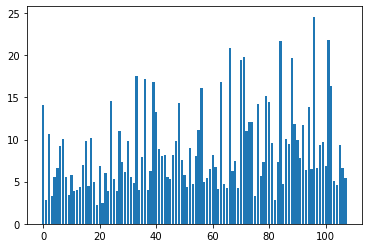

In [106]:
plt.bar(list(range(108)),X_test_std[0,0:108])

In [31]:
X_train_std

array([[-0.02715027, -0.11008544,  1.49868173, ..., -1.61131519,
        -1.14308696, -0.74078627],
       [-0.24893524,  1.64136479, -1.22896894, ..., -0.74932298,
        -0.59332401, -0.97683084],
       [ 1.55693287,  1.19322261, -0.18103176, ..., -0.6302131 ,
        -0.39534438, -0.65687999],
       ...,
       [-0.59198614,  0.71593963,  0.17447559, ..., -0.0447213 ,
        -0.45732296, -0.33106505],
       [ 0.14917037, -0.41498463, -0.65756251, ..., -0.81043714,
        -0.42654482, -0.75366931],
       [-0.63936605, -0.82598112, -0.87563668, ..., -1.21188213,
        -1.14321556, -0.95799594]])

In [32]:
# plt.bar(list(range(159)),X_train[:,0])
# X_train[:,0].shape

In [100]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

clf = SVC(kernel='rbf')

#fit with non standardize data
clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print("non standardize:",clf.score(X_test, y_test))

#fit with standardize data
# clf.fit(X_train_std, y_train)
# print("standardize:",clf.score(X_test_std, y_test))

Training accuracy: 0.9217877094972067
non standardize: 0.85


In [94]:
# Sequence forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf,
          k_features = 4,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          n_jobs=-1,
          cv=10)
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.5s finished

[2022-03-07 14:17:36] Features: 1/4 -- score: 0.877124183006536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    0.5s finished

[2022-03-07 14:17:36] Features: 2/4 -- score: 0.8830065359477125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    0.5s finished

[2022-03-07 14:17:37] Features: 3/4 -- score: 0.8830065359477125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 10

In [95]:
list(sfs1.k_feature_idx_)

[2, 6, 7, 83]

In [96]:
degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]

Index(['MPO', 'MAFF', 'TYMS', 'MANSC1'], dtype='object')

In [97]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_test_df

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.312114,0.169041,0.224603,0.176508,0.195024,0.269968,0.260537,0.265110,0.205847,0.174653,...,0.217853,0.216329,0.190865,0.239073,0.192454,0.184033,0.184936,0.196225,0.177718,0.187538
1,0.237733,0.179592,0.247505,0.138322,0.303097,0.184619,0.196067,0.131127,0.357791,0.173079,...,0.189413,0.293542,0.240055,0.206590,0.259797,0.261991,0.256702,0.257990,0.264772,0.263837
2,0.289789,0.189444,0.218702,0.141078,0.255866,0.164990,0.149481,0.263725,0.239787,0.157383,...,0.280584,0.267423,0.232533,0.217020,0.209477,0.202855,0.267415,0.263020,0.272566,0.226943
3,0.134030,0.183193,0.272041,0.144535,0.166090,0.148927,0.255724,0.142350,0.148427,0.132364,...,0.188358,0.229959,0.186865,0.226662,0.213646,0.187184,0.180911,0.182898,0.196355,0.219407
4,0.116848,0.144552,0.219666,0.100830,0.221155,0.133234,0.241620,0.238523,0.200711,0.145832,...,0.171892,0.206374,0.221029,0.235992,0.210220,0.198463,0.208295,0.231124,0.192978,0.202710
5,0.216373,0.227299,0.259420,0.295537,0.272490,0.308401,0.117518,0.218249,0.265731,0.194611,...,0.247619,0.246516,0.209273,0.246861,0.236096,0.245501,0.320903,0.253556,0.207297,0.226726
6,0.269870,0.178256,0.236903,0.130674,0.161310,0.245078,0.249507,0.274907,0.158380,0.240844,...,0.209152,0.198544,0.185298,0.242676,0.223011,0.161408,0.175197,0.195447,0.196169,0.153789
7,0.224991,0.171519,0.211729,0.374130,0.269078,0.136033,0.164877,0.136640,0.284830,0.203844,...,0.190679,0.244772,0.238258,0.216848,0.234194,0.251915,0.271788,0.246147,0.241015,0.235524
8,0.245397,0.089048,0.196402,0.117913,0.151803,0.264268,0.198031,0.199514,0.140974,0.184906,...,0.239596,0.190665,0.201987,0.245680,0.214762,0.189924,0.144176,0.203531,0.196285,0.200086
9,0.262606,0.252072,0.265763,0.394344,0.339490,0.422096,0.195710,0.285142,0.359502,0.477500,...,0.345249,0.316268,0.372399,0.218389,0.254758,0.441076,0.353100,0.325863,0.357832,0.329910


In [98]:
# X_train_sele = sfs1.transform(X_train)
# X_test_sele = sfs1.transform(X_test)
# fit selection data to model

# X_train_sele = X[degs_sele]
# X_test_sele = X[degs_sele]

X_train_sele = preprocessing.normalize(X_train_df.iloc[:,list(sfs1.k_feature_idx_)], axis=0)
X_test_sele = preprocessing.normalize(X_test_df.iloc[:,list(sfs1.k_feature_idx_)], axis=0)
X_test_sele.shape

(20, 4)

In [99]:
# X_train_sele
clf.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(clf.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(clf.predict(X_test_sele) == y_test)*100)

Training accuracy: 91.06145251396647
Test accuracy: 85.0


In [72]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (0,),
  'cv_scores': array([0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
         0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.88235294]),
  'avg_score': 0.8604575163398692,
  'feature_names': ('0',),
  'ci_bound': 0.02019221653818191,
  'std_dev': 0.027187107105611816,
  'std_err': 0.009062369035203938},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
         0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.88235294]),
  'avg_score': 0.8604575163398692,
  'feature_names': ('0', '1'),
  'ci_bound': 0.02019221653818191,
  'std_dev': 0.027187107105611816,
  'std_err': 0.009062369035203938},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
         0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.88235294]),
  'avg_score': 0.8604575163398692,
  'feature_names': ('0', '1', '2'),
  'ci_bound': 0.02019221653818191,
  'std_dev

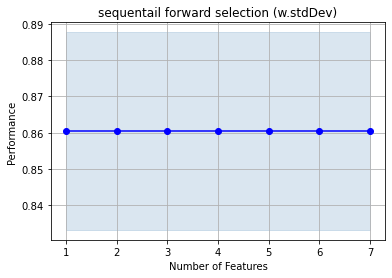

In [73]:
# plot
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)

df = pd.DataFrame.from_dict(metric_dict).T

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(metric_dict, kind='std_dev')
plt.title('sequentail forward selection (w.stdDev)')
plt.grid()
plt.show()


In [74]:
df = pd.DataFrame.from_dict(metric_dict).T
df.iloc[1,1]

array([0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.88235294])

In [76]:
# Using RFE
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)
rfe.fit(X_train_std,y_train)

X_train_sub = rfe.transform(X_train_std)

In [77]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False])

In [79]:
degs_gene_data.columns[0:108][rfe.support_]

Index(['RHAG', 'PRG2', 'SLCO4A1', 'CCNB1', 'H1F0', 'BTG3', 'STAT4', 'CKS1B',
       'TNFAIP3', 'CD302', 'BUB1B', 'RPA3', 'CLEC7A', 'RAD51', 'AURKA'],
      dtype='object')

In [80]:
X_train_sele = rfe.transform(X_train_std)
X_test_sele = rfe.transform(X_test_std)

In [81]:
X_train_sele

array([[-0.11008544,  0.10335742,  2.52086184, ..., -2.33827669,
        -1.3276769 , -0.29380394],
       [ 1.64136479,  0.25573425, -1.07269936, ...,  1.28834103,
        -0.62254126, -0.18619458],
       [ 1.19322261, -0.34965072, -0.97720485, ...,  0.62370932,
        -0.46155402, -0.53025424],
       ...,
       [ 0.71593963, -0.37084403, -0.47250534, ..., -0.1025419 ,
        -0.52844779, -0.95402043],
       [-0.41498463, -0.67338556, -0.01583215, ...,  0.75416013,
        -1.28188985, -0.41153652],
       [-0.82598112, -0.64296233, -0.91943247, ..., -0.13120803,
        -0.410219  , -0.59318252]])

In [82]:
clf.fit(X_train_sele,y_train)
clf.score(X_test_sele,y_test)

0.15

In [11]:
a = [1, 2, 3, 4, 5]
sum(a)

15